## Track Features EDA
 

In [24]:
import pandas as pd
import numpy as np
import re
import swifter #used to make pd.apply more efficient
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn

import warnings
warnings.filterwarnings('ignore')

In [25]:
tracks_df = pd.read_csv('/Users/mariamtamer/VSCodeProjects/lyricalanalysis/data/all_tracks_cleaned.csv')

In [26]:
tracks_df.head()

,track_uri,track_name,cleaned_track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_genres,track_duration_ms,track_time_signature,...,track_valence,track_lyrics,lyrics_page_views,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,album_cover
0,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,Champagne Poetry,"('Drake',)",NaN,True,82,"('hip hop', 'pop', 'rap')",336511,4.0,...,0.496,"Champagne Poetry Lyrics\n\nI love you, I love ...",688853.0,1,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
1,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,Papi’s Home,"('Drake',)",NaN,True,76,"('hip hop', 'pop', 'rap')",178623,4.0,...,0.588,Papi’s Home Lyrics\nI know that I hurt you\nYe...,445883.0,2,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
2,spotify:track:37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),NaN,"('Drake', 'Lil Baby')",NaN,True,86,"('hip hop', 'pop', 'rap', 'trap')",221979,4.0,...,0.381,NaN,NaN,3,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
3,spotify:track:61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),In The Bible,"('Drake', 'Lil Durk', 'Giveon')","('GIVĒON', 'Lil Durk')",True,79,"('hip hop', 'pop', 'rap', 'drill', 'trap', 'r&b')",296568,4.0,...,0.147,"In The Bible Lyrics\nOkay, okay, okay\nCountin...",439186.0,4,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...
4,spotify:track:4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),NaN,"('Drake', 'JAY-Z')",NaN,True,77,"('hip hop', 'pop', 'rap')",228461,4.0,...,0.155,NaN,NaN,5,Certified Lover Boy,Drake,2021-09-03,95,OVO,https://i.scdn.co/image/ab67616d00001e02cd945b...


The first graph which was created represents the top 10 artists with the most tracks on spotify, which is represented using a bar graph. From this we can see that Louis Armstrong had the most tracks, and there is a huge drop off after the top 4 artists. 
Representing this data as a pie chart may make the data easier to understand as there can be percentages to understand the difference in the occurences.

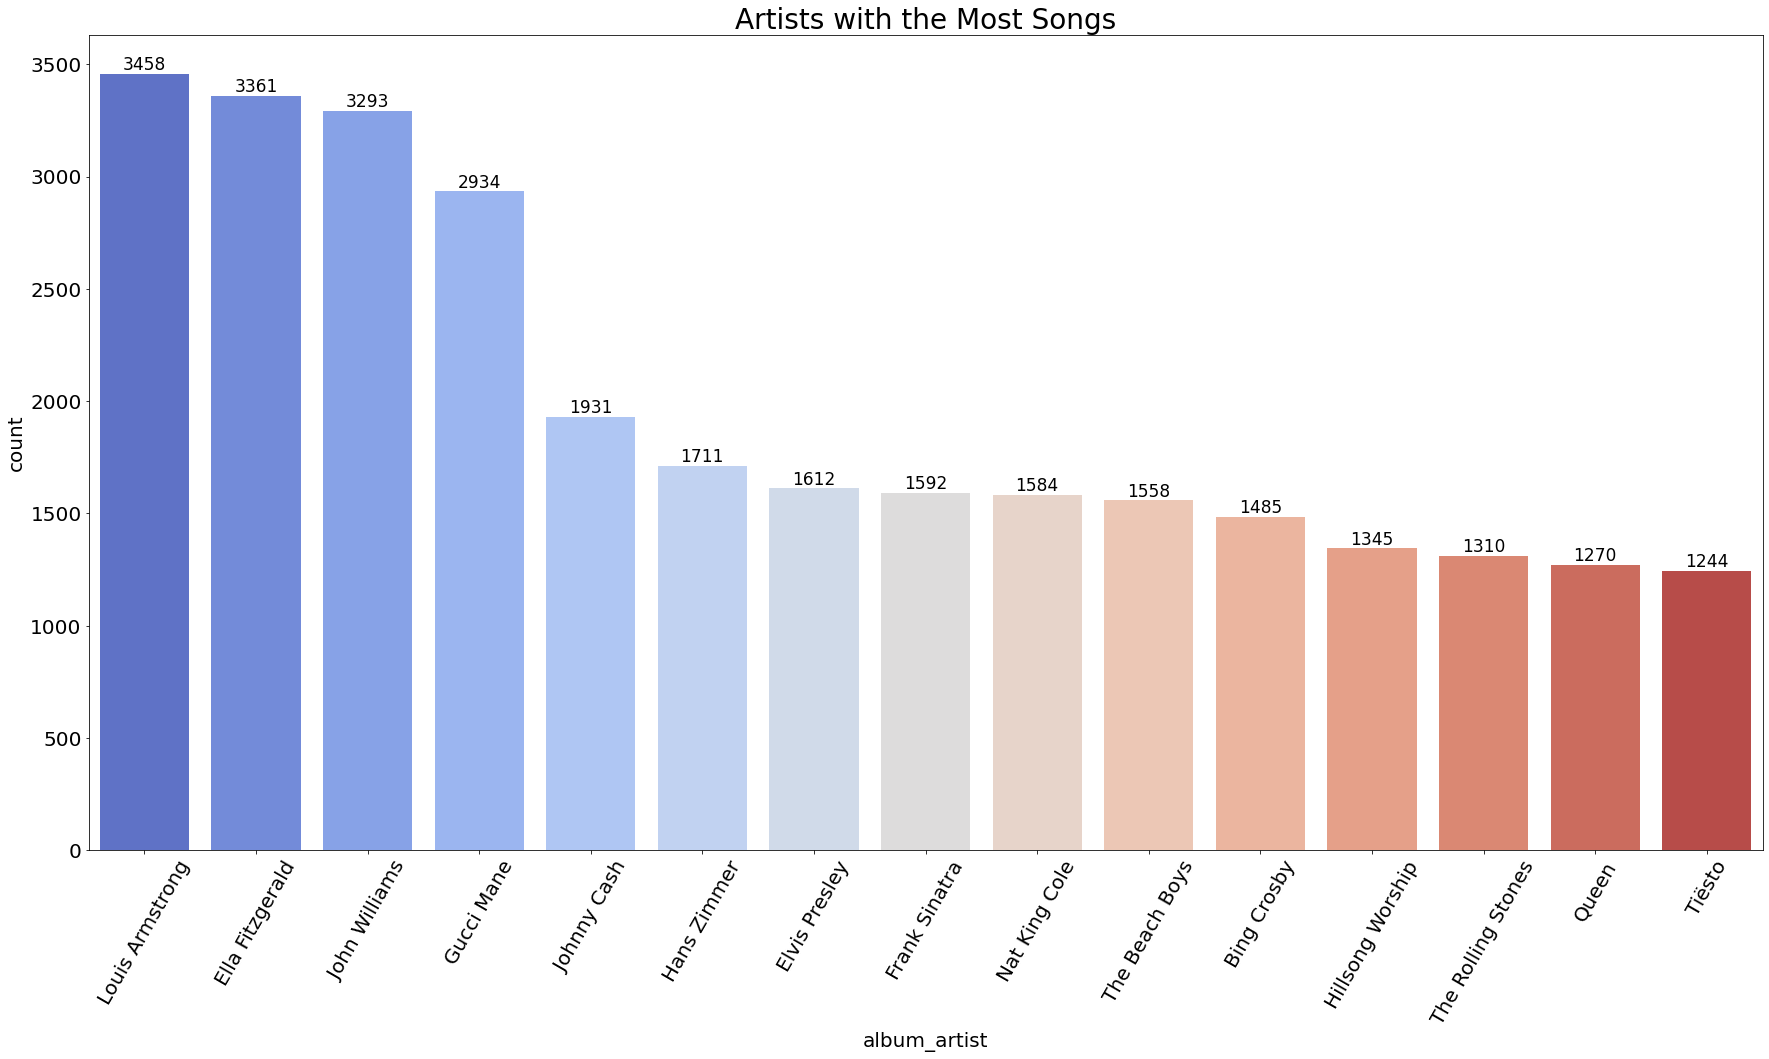

In [27]:
plt.figure(figsize=(30,15))
plt.title('Artists with the Most Songs',fontsize=28)
plt.xlabel('Artist', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.album_artist,order=pd.value_counts(tracks_df.album_artist).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

Now that the data is represented as a pie chart, the difference in the occurences can be seen more clearly.

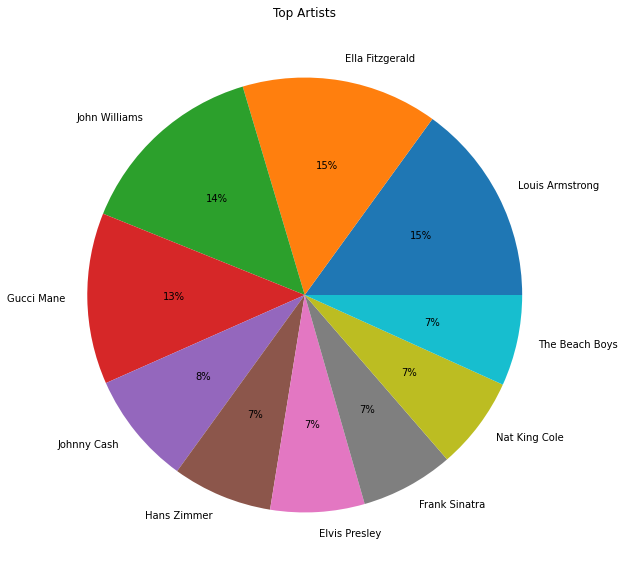

In [34]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['album_artist'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Artists", ylabel = "")
fig.set_facecolor('white')


In [28]:
tracks_df["top_genre"] = tracks_df.track_genres.str.split(',').str.get(0)

In [29]:
tracks_df["top_genre"] = tracks_df["top_genre"].str.replace('(', '').str.replace("'","").str.replace(')', '')

The second quesiton to be answered is what genres do people enjoy listening to, this will be represented as a graph and pie chart of the top 10 genres. From this data, it shows that 21% of songs are rock songs, followed by hip hop.

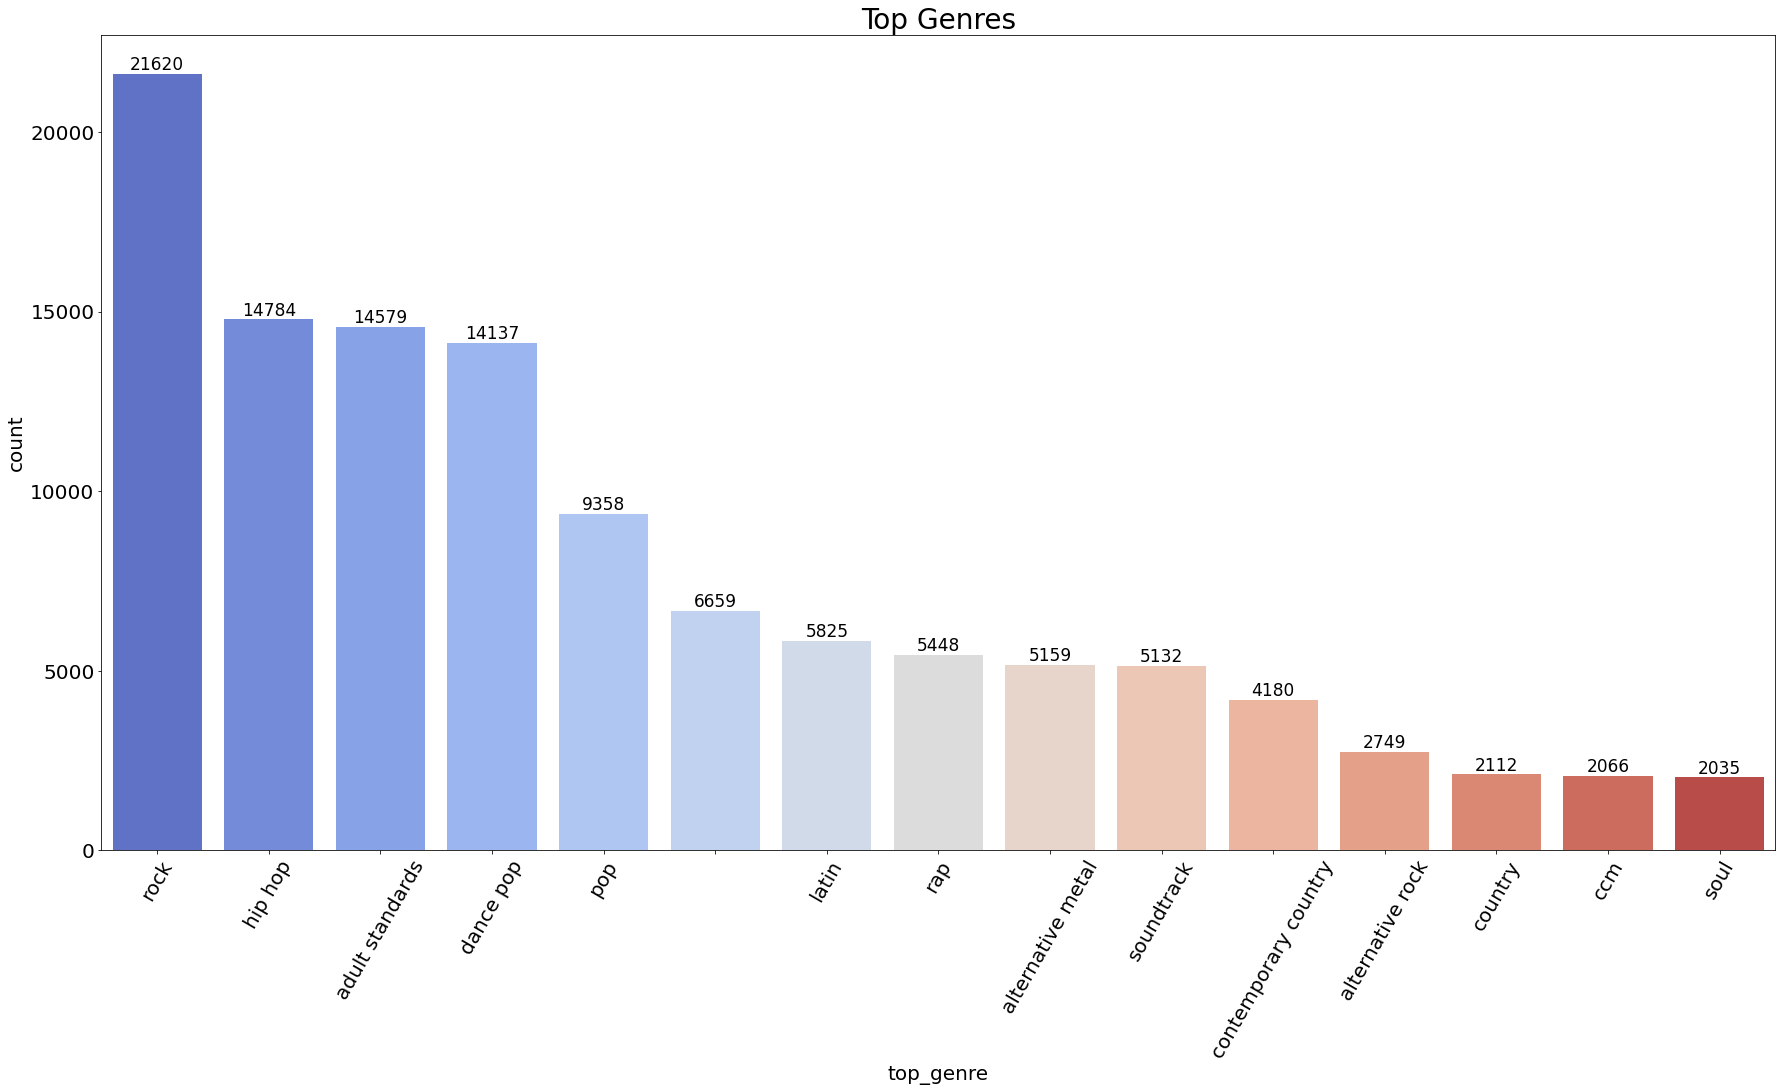

In [32]:
plt.figure(figsize=(30,15))
plt.title('Top Genres',fontsize=28)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.top_genre,order=pd.value_counts(tracks_df.top_genre).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

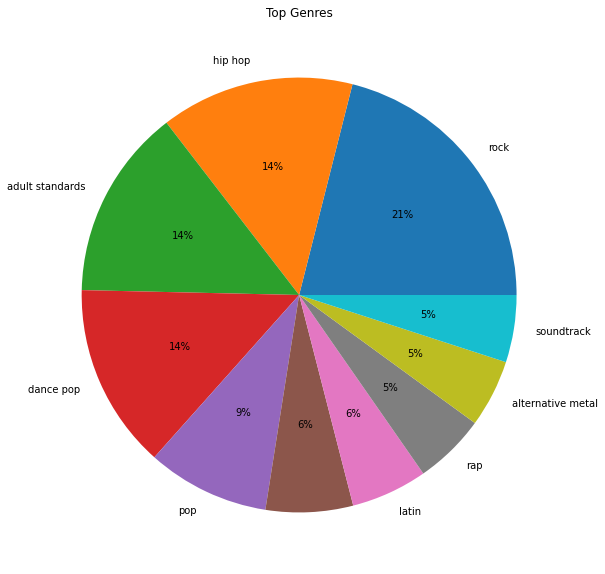

In [35]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['top_genre'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Genres", ylabel = "")
fig.set_facecolor('white')

Now, moving onto the top 10 record labels. Record labels are important when artists are first publishing a song, as it can affect the popularity of a song related to the marketing. Record labels also hold rights to the song. From the pie chart, it shows that 20% of the data are published by Columbia records.

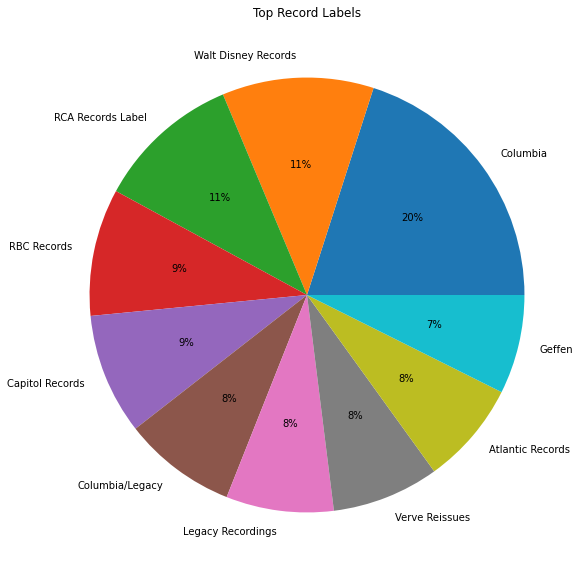

In [36]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['album_record_label'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Record Labels", ylabel = "")
fig.set_facecolor('white')

Seeing which key signature is most frequently used can help understand what key signature people prefer when listening to music as it can affect the perception of the song. From the pie chart, it shows that the most popular key signature is C Major

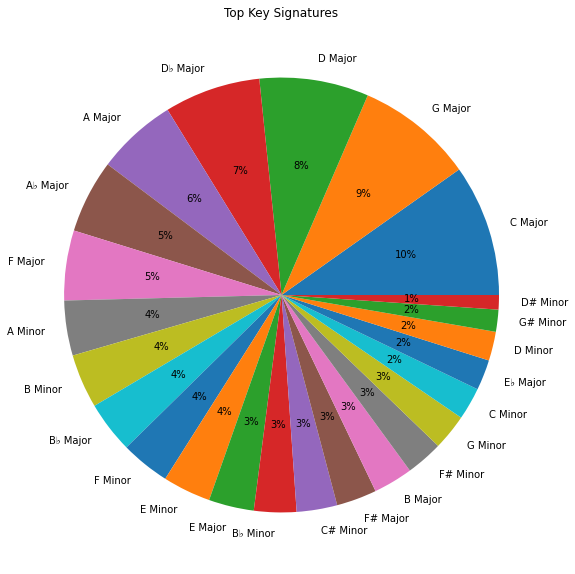

In [37]:
fig, ax = plt.subplots(figsize = (20,12))
tracks_df['track_key_signature'].value_counts().plot.pie(figsize=(15,10), autopct='%1.0f%%', title = "Top Key Signatures", ylabel = "")
fig.set_facecolor('white')

The next graph to be made is to show which year had the most album releases, and from this chart, it is clear that the past 3 years have had the most song release, which could be related to social media apps such as tiktok gaining popularity, which can help artists makret their songs.

In [38]:
tracks_df["year_release"] = tracks_df.album_release_date.str.split('-').str.get(0)

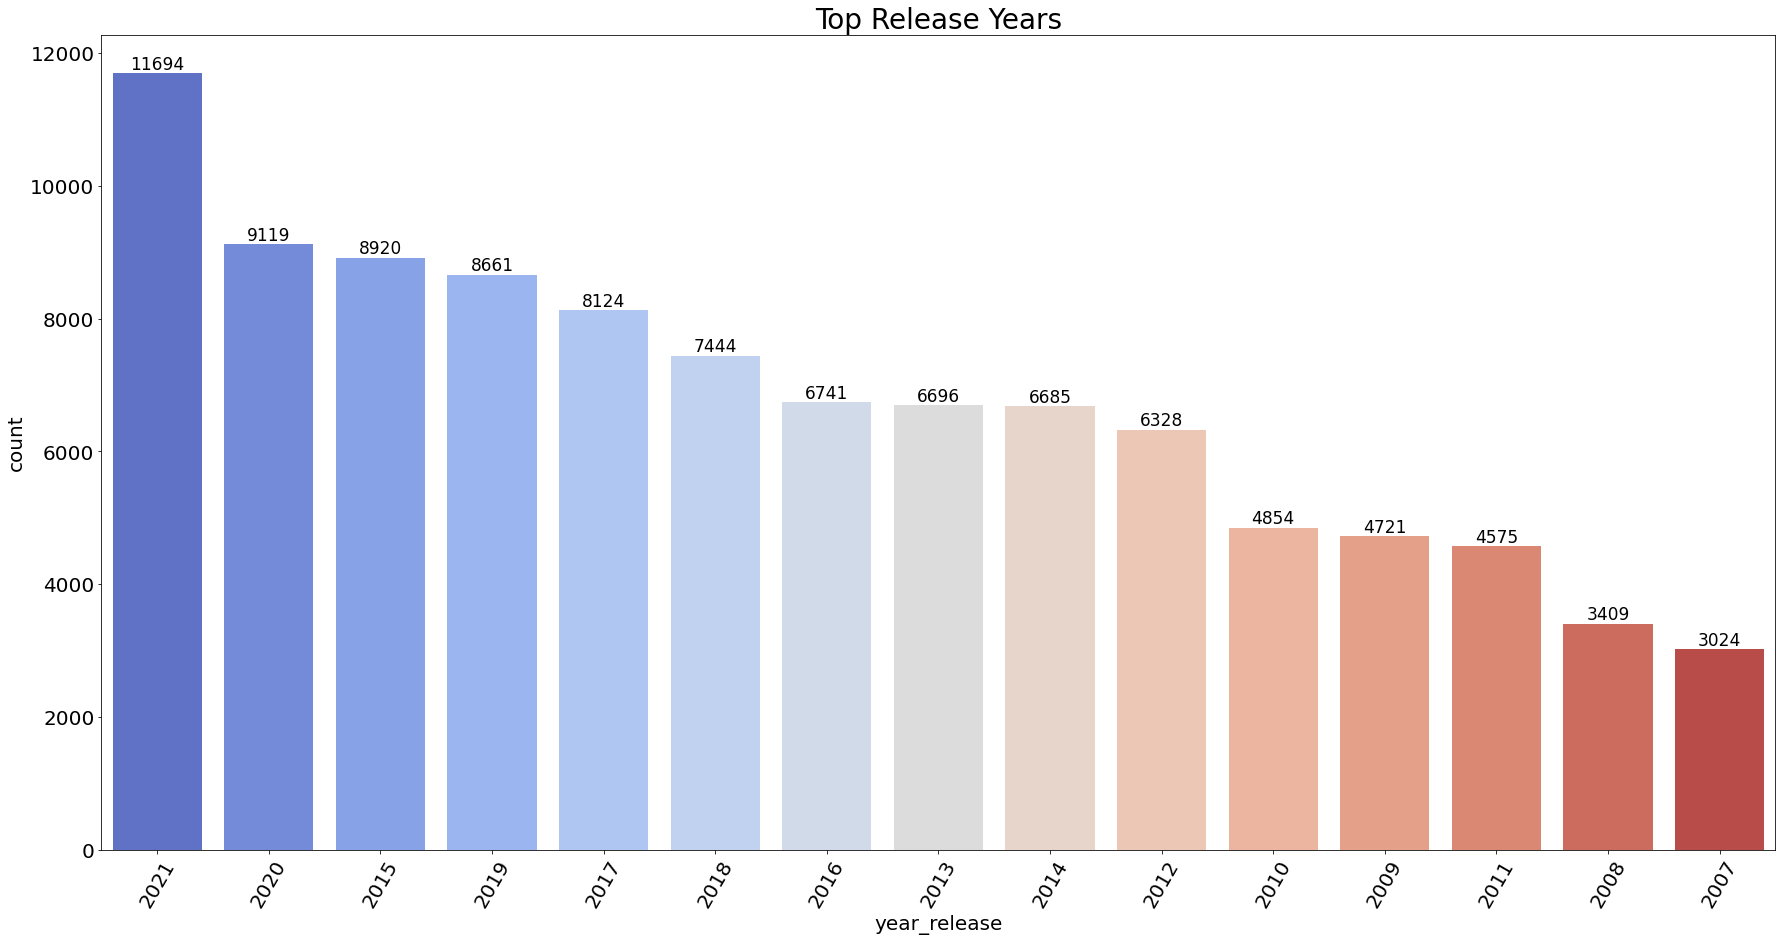

In [39]:
plt.figure(figsize=(30,15))
plt.title('Top Release Years',fontsize=28)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

ax = seaborn.countplot(tracks_df.year_release,order=pd.value_counts(tracks_df.year_release).iloc[:15].index,palette=seaborn.color_palette("coolwarm", 15))
ax.bar_label(ax.containers[0], fontsize=17)
plt.xticks(size=20,rotation=60)
plt.yticks(size=20)
#sns.despine(bottom=True, left=True)
plt.show()

In [30]:
tracks_audio_features = tracks_df[['track_uri', 'track_name', 'track_artists', 'featured_artists', 'track_is_explicit', 'track_popularity', 'track_duration_ms', 'track_time_signature', 'track_acousticness', 
'track_danceability', 'track_energy', 'track_instrumentalness', 'track_key', 'track_mode', 'track_liveness', 'track_loudness', 'track_speechiness', 'track_tempo', 'track_valence', 
'track_number', 'album_name', 'album_artist', 'album_release_date', 'album_popularity','album_record_label']]


In [7]:
top_tracks = tracks_audio_features.sort_values('track_popularity', ascending = False).head(500)
top_tracks.head()

,track_uri,track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_duration_ms,track_time_signature,track_acousticness,track_danceability,...,track_loudness,track_speechiness,track_tempo,track_valence,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label
13697,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,Woman,"('Doja Cat',)",NaN,True,97,172626,4.0,0.0888,0.824,...,-4.175,0.0854,107.998,0.881,1,Planet Her,Doja Cat,2021-06-25,98,Kemosabe Records/RCA Records
21272,spotify:track:0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,"('Lil Nas X',)",NaN,True,97,143901,4.0,0.0380,0.772,...,-7.410,0.2310,76.065,0.207,4,MONTERO,Lil Nas X,2021-09-17,95,Columbia
281,spotify:track:3rmo8F54jFF8OgYsqTxm5d,Bad Habits,"('Ed Sheeran',)",NaN,False,96,230746,4.0,0.0451,0.807,...,-3.745,0.0347,126.011,0.537,4,=,Ed Sheeran,2021-10-29,96,Atlantic Records UK
279,spotify:track:50nfwKoDiSYg8zOCREWAm5,Shivers,"('Ed Sheeran',)",NaN,False,96,207853,4.0,0.2810,0.788,...,-2.724,0.0856,141.020,0.822,2,=,Ed Sheeran,2021-10-29,96,Atlantic Records UK
22762,spotify:track:4ZtFanR9U6ndgddUvNcjcG,good 4 u,"('Olivia Rodrigo',)",NaN,True,96,178146,4.0,0.1780,0.754,...,-3.449,0.0608,75.003,0.800,6,SOUR,Olivia Rodrigo,2021-05-21,100,Olivia Rodrigo PS


In [8]:
def time_in_minutes(duration):
    seconds = duration/1000
    minutes = seconds/60
    return minutes

tracks_audio_features['track_duration_minutes'] = tracks_audio_features['track_duration_ms'].map(time_in_minutes)
tracks_audio_features.head()

/var/folders/58/js6pcsmx285bmrndbqrmgcqm0000gn/T/ipykernel_2589/1394044108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_audio_features['track_duration_minutes'] = tracks_audio_features['track_duration_ms'].map(time_in_minutes)


,track_uri,track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_duration_ms,track_time_signature,track_acousticness,track_danceability,...,track_speechiness,track_tempo,track_valence,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,track_duration_minutes
0,spotify:track:2HSmyk2qMN8WQjuGhaQgCk,Champagne Poetry,"('Drake',)",NaN,True,82,336511,4.0,0.758,0.423,...,0.326,86.743,0.496,1,Certified Lover Boy,Drake,2021-09-03,95,OVO,5.608517
1,spotify:track:6jy9yJfgCsMHdu2Oz4BGKX,Papi’s Home,"('Drake',)",NaN,True,76,178623,4.0,0.112,0.701,...,0.313,140.177,0.588,2,Certified Lover Boy,Drake,2021-09-03,95,OVO,2.977050
2,spotify:track:37Nqx7iavZpotJSDXZWbJ3,Girls Want Girls (with Lil Baby),"('Drake', 'Lil Baby')",NaN,True,86,221979,4.0,0.181,0.767,...,0.290,86.975,0.381,3,Certified Lover Boy,Drake,2021-09-03,95,OVO,3.699650
3,spotify:track:61S79KIVA4I9FXbnsylEHT,In The Bible (with Lil Durk & Giveon),"('Drake', 'Lil Durk', 'Giveon')","('GIVĒON', 'Lil Durk')",True,79,296568,4.0,0.614,0.686,...,0.297,143.070,0.147,4,Certified Lover Boy,Drake,2021-09-03,95,OVO,4.942800
4,spotify:track:4VCbgIdr8ptegWeJpqLVHH,Love All (with JAY-Z),"('Drake', 'JAY-Z')",NaN,True,77,228461,4.0,0.354,0.730,...,0.287,92.131,0.155,5,Certified Lover Boy,Drake,2021-09-03,95,OVO,3.807683


In [14]:
top_tracks = tracks_audio_features.sort_values('track_duration_minutes', ascending = False).head(500)
top_tracks

,track_uri,track_name,cleaned_track_name,track_artists,featured_artists,track_is_explicit,track_popularity,track_genres,track_duration_ms,track_time_signature,...,track_lyrics,lyrics_page_views,track_number,album_name,album_artist,album_release_date,album_popularity,album_record_label,album_cover,track_duration_minutes
134856,spotify:track:2vU6kbZI3bLM6ASsnSe11J,Until One,NaN,"('Swedish House Mafia',)",NaN,False,0,"('dance pop', 'edm', 'electro house', 'pop', '...",4794398,4.0,...,NaN,NaN,1,Until One,Swedish House Mafia,2010-01-01,0,Virgin,https://i.scdn.co/image/ab67616d00001e02c4c106...,79.906633
25974,spotify:track:6a5WY5noWtocG3uvK0YhnV,Continuous Mix,NaN,"('Tiësto',)",NaN,False,0,"('big room', 'brostep', 'dance pop', 'edm', 'h...",4777826,4.0,...,NaN,NaN,16,In Search Of Sunrise 3 - Panama,Tiësto,2003,33,Songbird,https://i.scdn.co/image/ab67616d00001e027b7a93...,79.630433
25433,spotify:track:6qBPdCvbixc1lm5yTJQdkJ,"Continuous Mix Nyana, mix 2",NaN,"('Tiësto',)",NaN,False,0,"('big room', 'brostep', 'dance pop', 'edm', 'h...",4737986,4.0,...,NaN,NaN,30,Nyana,Tiësto,2010-11-01,33,Black Hole Recordings,https://i.scdn.co/image/ab67616d00001e023e75bc...,78.966433
25887,spotify:track:5JBYgl5qIfOQrtg8NFDjCL,Continuous Mix 1,NaN,"('Tiësto',)",NaN,False,0,"('big room', 'brostep', 'dance pop', 'edm', 'h...",4684626,4.0,...,NaN,NaN,29,In Search Of Sunrise 6 - Ibiza,Tiësto,2007-09-07,36,Songbird,https://i.scdn.co/image/ab67616d00001e020ce2a6...,78.077100
25611,spotify:track:3ZCfB5mAgWYJsft0an1FOb,Continuous Mix 1,NaN,"('Tiësto',)",NaN,False,0,"('big room', 'brostep', 'dance pop', 'edm', 'h...",4669720,4.0,...,NaN,NaN,29,In Search Of Sunrise 4 - Latin America,Tiësto,2009-11-16,33,Songbird,https://i.scdn.co/image/ab67616d00001e026a6ded...,77.828667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27298,spotify:track:3nB82yGjtbQFSU0JLAwLRH,Not a Bad Thing,Not a Bad Thing,"('Justin Timberlake',)",NaN,True,61,"('dance pop', 'pop')",688453,4.0,...,Not a Bad Thing Lyrics\nSaid all I want from y...,207777.0,11,The 20/20 Experience - 2 of 2 (Deluxe),Justin Timberlake,2013-09-27,62,RCA Records Label,https://i.scdn.co/image/ab67616d00001e0231dc01...,11.474217
136536,spotify:track:2cTOlcHulTsu9i0JjLgI42,Sex Me (Part I) / Sex Me (Part II),Sex Me (Part I) / Sex Me (Part II),"('R. Kelly',)",NaN,False,45,(),687493,4.0,...,"Sex Me (Part I) / Sex Me (Part II) LyricsBaby,...",NaN,11,12 Play,R. Kelly,1993-11-07,59,Jive,https://i.scdn.co/image/ab67616d00001e02b0369e...,11.458217
31506,spotify:track:4A0oGykvqU944YwUvY5pJj,Midnight Rambler - Live At The Roundhouse / 1971,Midnight Rambler (Live At The Roundhouse / 1971),"('The Rolling Stones',)",NaN,False,22,"('british invasion', 'rock')",686693,4.0,...,Midnight Rambler (Live At The Roundhouse / 197...,NaN,9,Sticky Fingers (Super Deluxe),The Rolling Stones,1971-04-23,44,Polydor Records,https://i.scdn.co/image/ab67616d00001e0221c5b3...,11.444883
31486,spotify:track:1XudeTABHeEFSMo0Nvuj7E,Midnight Rambler - Live At The Roundhouse / 1971,Midnight Rambler (Live At The Roundhouse / 1971),"('The Rolling Stones',)",NaN,False,29,"('british invasion', 'rock')",686693,4.0,...,Midnight Rambler (Live At The Roundhouse / 197...,NaN,9,Sticky Fingers (Deluxe),The Rolling Stones,1971-04-23,54,Polydor Records,https://i.scdn.co/image/ab67616d00001e02141291...,11.444883


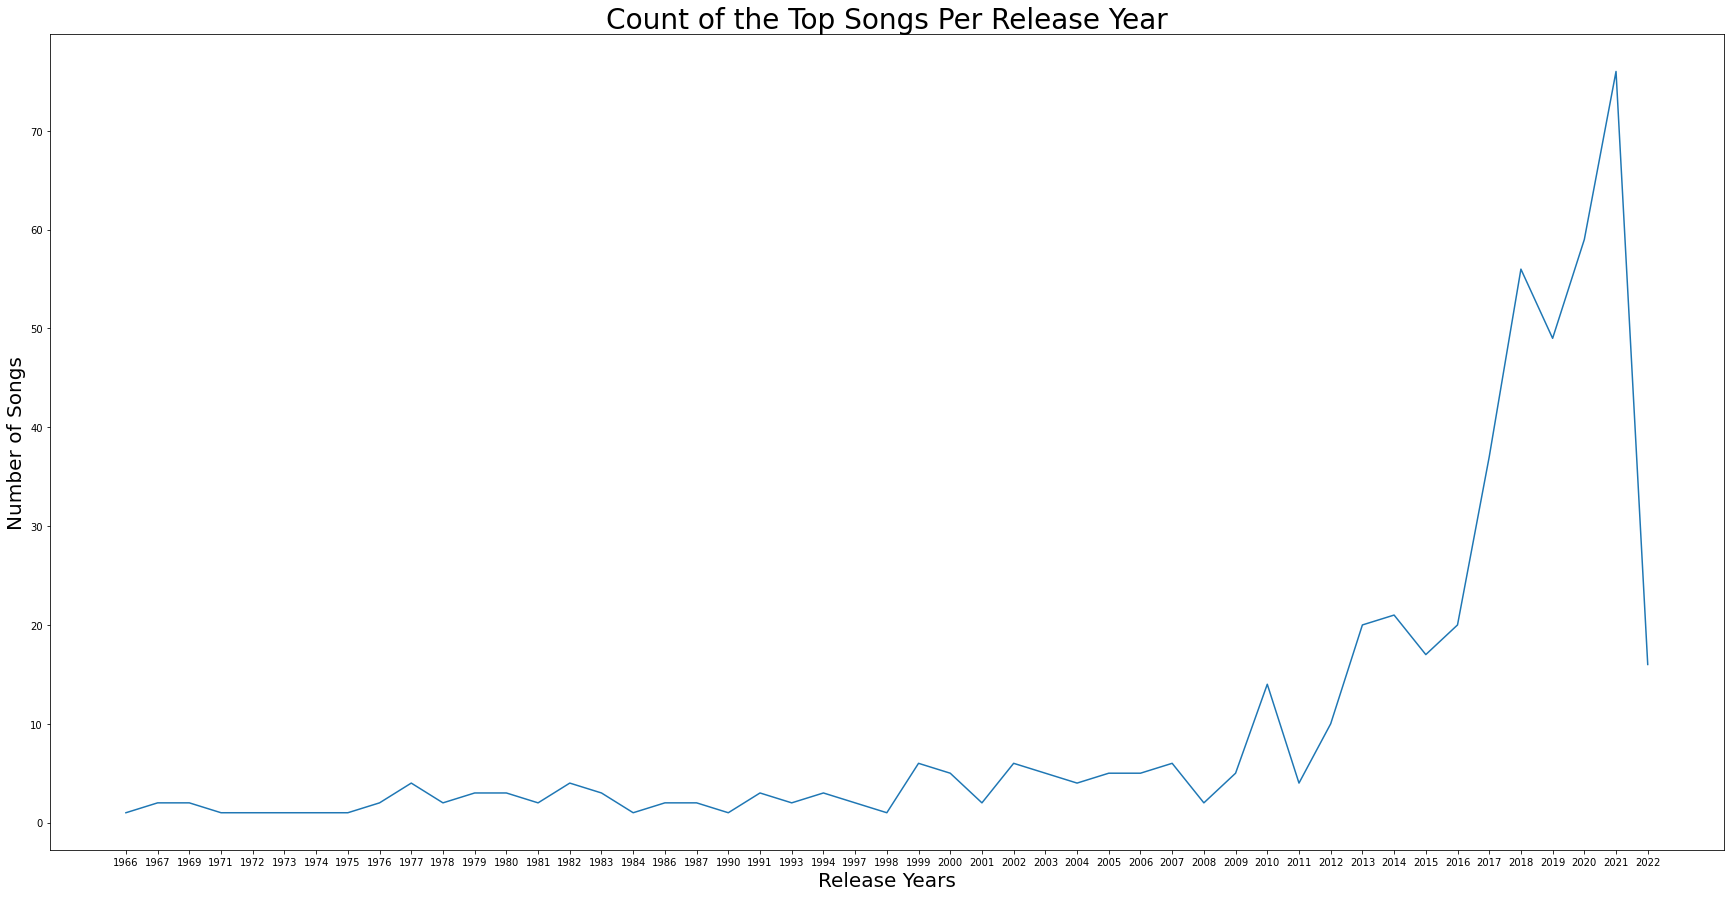

In [9]:
album_release_years = top_tracks['album_release_date'].map(lambda x: x[:4])
top_tracks['album_release_year'] = album_release_years
y = top_tracks.groupby(['album_release_year']).count()['track_uri'].values
plt.figure(figsize=(30,15))
plt.title('Count of the Top Songs Per Release Year',fontsize=28)
plt.xlabel('Release Years', fontsize=20)
plt.ylabel('Number of Songs', fontsize=20)

plt.plot(top_tracks.groupby(['album_release_year']).count().index, y)

In [40]:
labels = list(top_tracks)[:]
features = top_tracks.mean().tolist()
features_all = tracks_audio_features.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, features_all, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, features_all, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))